In [1]:
#must be very first statement
import tensorflow as tf
tf.debugging.set_log_device_placement(True)
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")

Num GPUs Available:  1
Default GPU Device: /device:GPU:0


In [2]:
from keras.datasets import cifar10
cifar10.load_data()

Using TensorFlow backend.


((array([[[[ 59,  62,  63],
           [ 43,  46,  45],
           [ 50,  48,  43],
           ...,
           [158, 132, 108],
           [152, 125, 102],
           [148, 124, 103]],
  
          [[ 16,  20,  20],
           [  0,   0,   0],
           [ 18,   8,   0],
           ...,
           [123,  88,  55],
           [119,  83,  50],
           [122,  87,  57]],
  
          [[ 25,  24,  21],
           [ 16,   7,   0],
           [ 49,  27,   8],
           ...,
           [118,  84,  50],
           [120,  84,  50],
           [109,  73,  42]],
  
          ...,
  
          [[208, 170,  96],
           [201, 153,  34],
           [198, 161,  26],
           ...,
           [160, 133,  70],
           [ 56,  31,   7],
           [ 53,  34,  20]],
  
          [[180, 139,  96],
           [173, 123,  42],
           [186, 144,  30],
           ...,
           [184, 148,  94],
           [ 97,  62,  34],
           [ 83,  53,  34]],
  
          [[177, 144, 116],
           [16

### Parameters

In [4]:
import os
import keras
from tensorflow.keras.datasets import cifar10
#from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import numpy as np

### PARAMS:
#[0:'airplane', 1:'automobile', 2:'bird', 3:'cat', 4:'deer', 5:'dog', 6:'frog', 7:'horse', 8:'ship', 9:'truck']
my_labels = [3,5]
batch_size = 32
epochs = 50
data_augmentation = False #self generate additional training data
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

### Data Preperation

In [5]:
#prepare selected labels for one hot encoding:
all_label_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
label_names = []
for label_index in my_labels:
    label_names.append(all_label_names[label_index])  

print("Defining new Labeling:")
print(dict(zip(range(len(my_labels)),label_names)))

#if my_labels = [5,6,8] then 5 returns 0, 6 returns 1, 8 returns 2, ...
def convert_label(label):
    return dict(zip(my_labels,range(len(my_labels))))[label]

def label_name(num):
    return label_names[num]

# The data, split between train and test sets:
(x_train_all, y_train_all), (x_test_all, y_test_all) = cifar10.load_data()
    
#temp lists
x_train = []
y_train_numerical = []

#filter training data for my_labels
for i in range(len(x_train_all)):
    if y_train_all[i] in my_labels:
        x_train.append(x_train_all[i])
        y_train_numerical.append(convert_label(y_train_all[i][0]))
    else:
        pass

x_train = np.array(x_train)
y_train_numerical = np.array(y_train_numerical)

print("Training Data:\n")
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'samples,', y_train_numerical.shape[0], 'labels')
print("\nClass  |  Counts:")
(unique, counts) = np.unique(y_train_numerical, return_counts=True)
for i, label in enumerate(unique):
    print(label_name(label),"\t", counts[i])


x_test = []
y_test_numerical = []

#filter test data
for i in range(len(x_test_all)):
    if y_test_all[i] in my_labels:
        x_test.append(x_test_all[i])
        y_test_numerical.append(convert_label(y_test_all[i][0]))
    else:
        pass

x_test = np.array(x_test)
y_test_numerical = np.array(y_test_numerical)

print("\n\nTesting Data:\n")
print('x_test shape:', x_test.shape)
print(x_test.shape[0], 'samples,', y_test_numerical.shape[0], 'labels')
print("\nClass  |  Counts:")
(unique, counts) = np.unique(y_test_numerical, return_counts=True)
for i, label in enumerate(unique):
    print(label_name(label),"\t", counts[i])

Defining new Labeling:
{0: 'cat', 1: 'dog'}
Training Data:

x_train shape: (10000, 32, 32, 3)
10000 samples, 10000 labels

Class  |  Counts:
cat 	 5000
dog 	 5000


Testing Data:

x_test shape: (2000, 32, 32, 3)
2000 samples, 2000 labels

Class  |  Counts:
cat 	 1000
dog 	 1000


dog


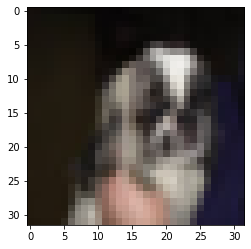

In [8]:
import matplotlib.pyplot as plt
testindex = 1999
img = x_test[testindex]
plt.imshow(img)
print(label_name(y_test_numerical[testindex]))

In [11]:
# labels to one hot vectors (for classification softmax loss)
y_train = keras.utils.to_categorical(y_train_numerical, len(my_labels))
y_test = keras.utils.to_categorical(y_test_numerical, len(my_labels))
y_test[15]

array([1., 0.], dtype=float32)

In [12]:
#values between 0 and 1 instead of 0 and 255
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape)

(10000, 32, 32, 3)


In [13]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

#previous multidim. values => single vector 512
#ohne flatten würde jeder filter einzeln interpretiert, so wird menge an filterergebnissen zusammengeführt
model.add(Flatten())

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(len(my_labels)))
model.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = tf.keras.optimizers.Adam(learning_rate=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

Executing op RandomUniform in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Sub in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Add in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op LogicalNot in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Assert in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/tas

In [14]:
import datetime
import tensorflow as tf
# open tb: tensorboard --logdir logs/
logdir = os.path.join(os.getcwd(), 'logs\\'+datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test),
          shuffle=True,
          callbacks=[tensorboard_callback])

Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Prefet

10000/10000 [==============================] - 2s 203us/sample - loss: 0.5668 - accuracy: 0.7041 - val_loss: 0.5443 - val_accuracy: 0.7285
Epoch 7/50
10000/10000 [==============================] - 2s 200us/sample - loss: 0.5472 - accuracy: 0.7173 - val_loss: 0.5331 - val_accuracy: 0.7305
Epoch 8/50
10000/10000 [==============================] - 2s 192us/sample - loss: 0.5329 - accuracy: 0.7260 - val_loss: 0.5240 - val_accuracy: 0.7325
Epoch 9/50
10000/10000 [==============================] - 2s 192us/sample - loss: 0.5198 - accuracy: 0.7387 - val_loss: 0.5163 - val_accuracy: 0.7365
Epoch 10/50
10000/10000 [==============================] - 2s 202us/sample - loss: 0.5065 - accuracy: 0.7487 - val_loss: 0.4947 - val_accuracy: 0.7630
Epoch 11/50
10000/10000 [==============================] - 2s 199us/sample - loss: 0.4961 - accuracy: 0.7535 - val_loss: 0.4889 - val_accuracy: 0.7580
Epoch 12/50
10000/10000 [==============================] - 2s 199us/sample - loss: 0.4879 - accuracy: 0.7619 

Epoch 32/50
10000/10000 [==============================] - 2s 189us/sample - loss: 0.3313 - accuracy: 0.8506 - val_loss: 0.4395 - val_accuracy: 0.7915
Epoch 33/50
10000/10000 [==============================] - 2s 190us/sample - loss: 0.3274 - accuracy: 0.8525 - val_loss: 0.4352 - val_accuracy: 0.7985
Epoch 34/50
10000/10000 [==============================] - 2s 189us/sample - loss: 0.3151 - accuracy: 0.8578 - val_loss: 0.4605 - val_accuracy: 0.7915
Epoch 35/50
10000/10000 [==============================] - 2s 190us/sample - loss: 0.3124 - accuracy: 0.8633 - val_loss: 0.4416 - val_accuracy: 0.7985
Epoch 36/50
10000/10000 [==============================] - 2s 191us/sample - loss: 0.3067 - accuracy: 0.8619 - val_loss: 0.4538 - val_accuracy: 0.7975
Epoch 37/50
10000/10000 [==============================] - 2s 192us/sample - loss: 0.2965 - accuracy: 0.8719 - val_loss: 0.4321 - val_accuracy: 0.8030
Epoch 38/50
10000/10000 [==============================] - 2s 194us/sample - loss: 0.2963 - ac

Correct label = cat
Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Prediction: [[0.98209584 0.01790418]]


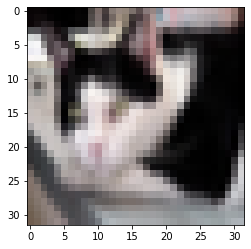

In [32]:
testindex = 56
img = x_test[testindex]
print("Correct label =",label_name(y_test_numerical[testindex]))
plt.imshow(img)
img = img.reshape((1,) + img.shape)
print("Prediction:",model.predict(img))

In [ ]:
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])